# Read GWF files

In [1]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
from gwpy.timeseries import TimeSeries
from lalframe.utils.frtools import get_channels

import jax
import jax.numpy as jnp
import numpy as np 
import matplotlib.pyplot as plt
from jimgw.single_event.detector import H1, L1, V1

2024-03-13 11:28:56.052642: W external/xla/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:2: failed initializing StreamExecutor for CUDA device ordinal 2: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 84974239744


In [10]:
data_path = "/home/thibeau.wouters/gw-datasets/GW190425/"

# Original data
data_dict = {"L1":{"data": data_path + "L-L1_HOFT_C01_T1700406_v3-1240211456-4096.gwf",
                   "psd": data_path + "glitch_median_PSD_forLI_L1_srate8192.txt",
                   "channel": "L1:DCS-CALIB_STRAIN_CLEAN_C01_T1700406_v3"},
            "V1":{"data": data_path + "V-V1Online_T1700406_v3-1240214000-2000.gwf",
                    "psd": data_path + "glitch_median_PSD_forLI_V1_srate8192.txt",
                    "channel": "V1:Hrec_hoft_16384Hz_T1700406_v3"}
}

# New attempt
data_dict = {"L1":{"data": data_path + "L-L1_GWOSC_16KHZ_R1-1240213455-4096.gwf",
                   "psd": data_path + "glitch_median_PSD_forLI_L1_srate8192.txt",
                   "channel": "L1:GWOSC-16KHZ_R1_STRAIN"},
            "V1":{"data": data_path + "V-V1_GWOSC_16KHZ_R1-1240213455-4096.gwf",
                    "psd": data_path + "glitch_median_PSD_forLI_V1_srate8192.txt",
                    "channel": "V1:GWOSC-16KHZ_R1_STRAIN"}
}

In [31]:
gps = 1240215503.017147
trigger_time = gps
fmin = 20
fmax = 2048
minimum_frequency = fmin
maximum_frequency = fmax
T = 128
duration = T
post_trigger_duration = 2
epoch = duration - post_trigger_duration
f_ref = fmin
tukey_alpha = 2 / (T / 2)
print(tukey_alpha)

gps_start_pad = duration-2
gps_end_pad = 2

# L1.load_data_from_frame(trigger_time=trigger_time,
#                         gps_start_pad=duration-2,
#                         gps_end_pad=2,
#                         frame_file_path=data_dict["L1"]["data"],
#                         channel_name=data_dict["L1"]["channel"],
#                         f_min=fmin,
#                         f_max=fmax,
#                         tukey_alpha=tukey_alpha)

# V1.load_data_from_frame(trigger_time=trigger_time,
#                         gps_start_pad=duration-2,
#                         gps_end_pad=2,
#                         frame_file_path=data_dict["V1"]["data"],
#                         channel_name=data_dict["V1"]["channel"],
#                         f_min=fmin,
#                         f_max=fmax,
#                         tukey_alpha=tukey_alpha)

# L1.psd = L1.load_psd(L1.frequencies, data_dict["L1"]["psd"])
# V1.psd = V1.load_psd(V1.frequencies, data_dict["V1"]["psd"])

0.03125


## Playing with hdf5 files

In [35]:
example_gwf_file = data_dict["L1"]["data"]
channel = data_dict["L1"]["channel"]

data_td = TimeSeries.read(example_gwf_file, channel,
                          start = trigger_time - gps_start_pad,
                          end = trigger_time + gps_end_pad)

print(data_td.value)
print(np.mean(data_td.value))

data_td = TimeSeries.read(example_gwf_file, channel)

print(data_td.value)
print(np.mean(data_td.value))

[7.88878441e+268 7.90092367e+268 7.83476823e+268 ...
 5.51847092e+188 1.87685746e+211 6.71245144e+189]
nan


/home/thibeau.wouters/miniconda3/envs/jim/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/thibeau.wouters/miniconda3/envs/jim/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


[3.28489880e-280 1.18952122e-255 1.12006694e-204 ...
 8.44097369e-153 8.44097369e-153 8.44097369e-153]
nan


In [12]:
V1.data

Array([nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj,
       nan+nanj], dtype=complex64)

/home/thibeau.wouters/miniconda3/envs/jim/lib/python3.10/site-packages/jax/_src/array.py:390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._value, dtype=dtype)


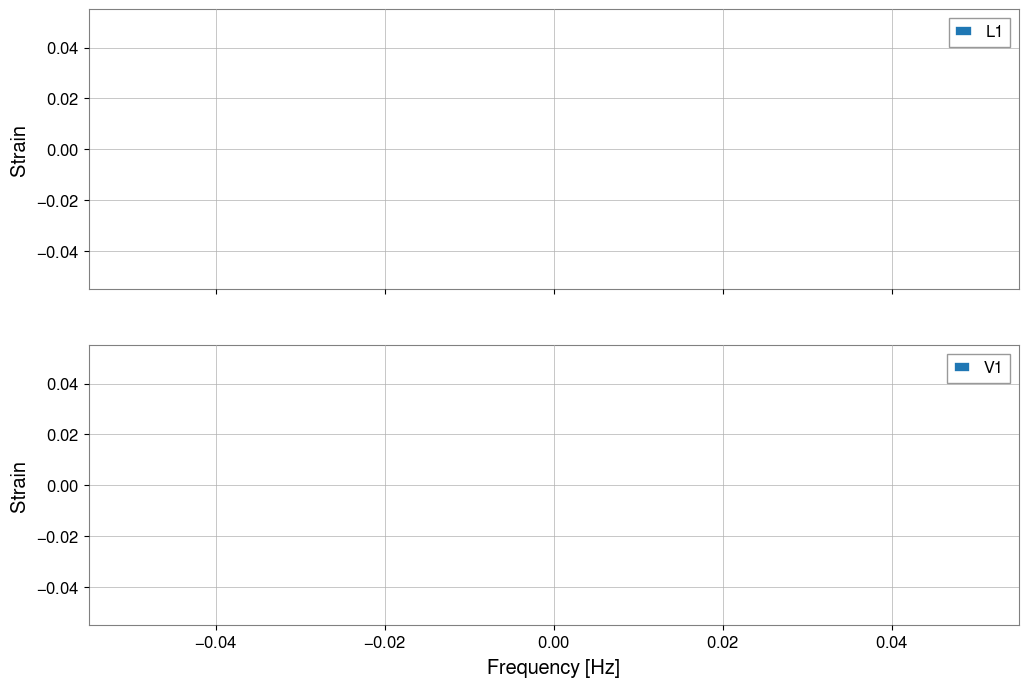

In [4]:
# Plot the two ifo data streams

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(L1.frequencies, L1.data, label="L1")
ax[1].plot(V1.frequencies, V1.data, label="V1")
ax[0].set_ylabel("Strain")
ax[1].set_ylabel("Strain")
ax[1].set_xlabel("Frequency [Hz]")
ax[0].legend()
ax[1].legend()
plt.show()

## txt files?

In [14]:
# txt_file = data_path + "L-L1_GWOSC_16KHZ_R1-1240213455-4096.txt"
# # Read the data
# data = np.loadtxt(txt_file)
# data

## hdf5 files

In [15]:
import h5py

In [28]:
h5_file = data_path + "V-V1_GWOSC_16KHZ_R1-1240213455-4096.hdf5"
with h5py.File(h5_file, "r") as f:
    print(f.keys())
    
    # Meta:
    print(f['meta'].keys())
    print(f['meta']['Description'][()])
    print(f['meta']['DescriptionURL'][()])
    print(f['meta']['Detector'][()])
    print(f['meta']['Detector'][()])
    duration = f['meta']['Duration'][()]
    gps_start = f['meta']['GPSstart'][()]
    print(f['meta']['Observatory'][()])
    print(f['meta']['Type'][()])
    print(f['meta']['UTCstart'][()])
    
    # data = f['strain']['Strain'][()]

<KeysViewHDF5 ['meta', 'quality', 'strain']>
<KeysViewHDF5 ['Description', 'DescriptionURL', 'Detector', 'Duration', 'GPSstart', 'Observatory', 'Type', 'UTCstart']>
b'Strain data time series from Virgo'
b'http://www.gw-openscience.org/'
b'V1'
b'V1'
4096
1240213455
b'V'
b'StrainTimeSeries'
b'2019-04-25T07:43:57'


In [38]:
data = TimeSeries.read(h5_file, format="hdf5.gwosc")
print(np.mean(data.value))

data = TimeSeries.read(h5_file, format="hdf5.gwosc",
                       start = trigger_time - gps_start_pad,
                       end = trigger_time + gps_end_pad)
print(np.mean(data.value))

9.29630999831302e-25
-1.0329245334379674e-23
